In [5]:
import qiskit
from qiskit import Aer, IBMQ, execute, assemble, QuantumCircuit, transpile
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_textbook.tools import simon_oracle #this function 'simon_oracle' creates a Simon oracle for the bitstring b

In [12]:
b = '1010'

In [13]:
n=len(b)
simon_circuit=QuantumCircuit(n*2, n)

#Hadamard gate before Query
simon_circuit.h(range(n))

#Barrier for easier visualization
simon_circuit.barrier()

#Apply oracle
simon_circuit=simon_circuit.compose(simon_oracle(b))

#Barrier for easier visualization
simon_circuit.barrier()

#Hadamard to the input register after Query
simon_circuit.h(range(n))

#Measure the qubits
simon_circuit.measure(range(n), range(n))
simon_circuit.draw()

┌───┐ ░                                ░ ┌───┐┌─┐         
q_0: ┤ H ├─░───■────────────────────────────░─┤ H ├┤M├─────────
     ├───┤ ░   │                            ░ ├───┤└╥┘┌─┐      
q_1: ┤ H ├─░───┼────■──────────────■────■───░─┤ H ├─╫─┤M├──────
     ├───┤ ░   │    │              │    │   ░ ├───┤ ║ └╥┘┌─┐   
q_2: ┤ H ├─░───┼────┼────■─────────┼────┼───░─┤ H ├─╫──╫─┤M├───
     ├───┤ ░   │    │    │         │    │   ░ ├───┤ ║  ║ └╥┘┌─┐
q_3: ┤ H ├─░───┼────┼────┼────■────┼────┼───░─┤ H ├─╫──╫──╫─┤M├
     └───┘ ░ ┌─┴─┐  │    │    │    │    │   ░ └───┘ ║  ║  ║ └╥┘
q_4: ──────░─┤ X ├──┼────┼────┼────┼────┼───░───────╫──╫──╫──╫─
           ░ └───┘┌─┴─┐  │    │  ┌─┴─┐  │   ░       ║  ║  ║  ║ 
q_5: ──────░──────┤ X ├──┼────┼──┤ X ├──┼───░───────╫──╫──╫──╫─
           ░      └───┘┌─┴─┐  │  └───┘  │   ░       ║  ║  ║  ║ 
q_6: ──────░───────────┤ X ├──┼─────────┼───░───────╫──╫──╫──╫─
           ░           └───┘┌─┴─┐     ┌─┴─┐ ░       ║  ║  ║  ║ 
q_7: ──────░────────────────┤ X ├─────┤ X ├─░───────╫──╫──╫──╫─
           ░                └───┘     └───┘ ░       ║  ║  ║  ║ 
c: 4/═══════════════════════════════════════════════╩══╩══╩══╩═
                                                    0  1  2  3

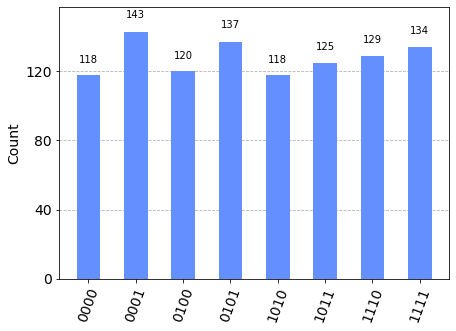

In [14]:
aer_sim=Aer.get_backend('aer_simulator')
results=aer_sim.run(simon_circuit).result()
counts=results.get_counts()
plot_histogram(counts)

In [15]:
#Calculating the dot product of results
def bdotwithz(b,z):
    temp=0
    for i in range(len(b)):
        temp+=int(b[i])*int(z[i])
        return (temp%2)
    
for z in counts:
    print('{}.{}={}(mod 2)'.format(b,z,bdotwithz(b,z)))

1010.0101=0(mod 2)
1010.1110=1(mod 2)
1010.1010=1(mod 2)
1010.0001=0(mod 2)
1010.0000=0(mod 2)
1010.1111=1(mod 2)
1010.0100=0(mod 2)
1010.1011=1(mod 2)


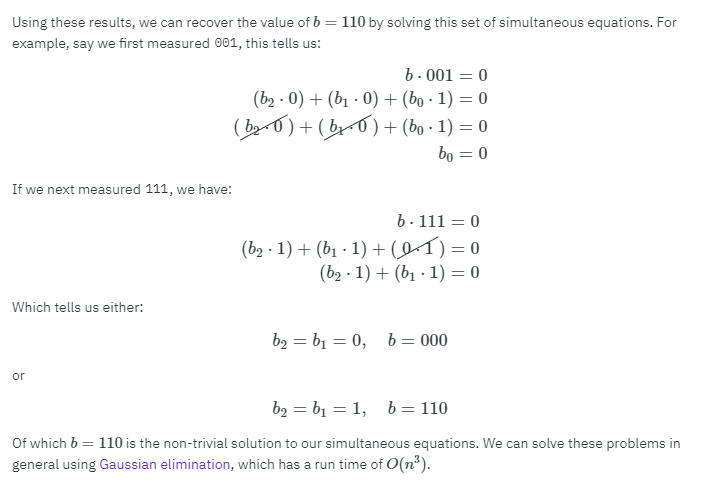